# IMPORT THE LIBRARIES

In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing
import seaborn as sns
from matplotlib import pyplot as plt
import os

# Import the Dataset

In [2]:
health_dataset = pd.read_csv('/Users/edselfabre/Downloads/Project 3 - Healthcare - Predictive Analytics/Dataset/cardio_data.csv')
health_dataset.head(10)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0
5,21-12-2021,Indonesia,8,0,21914,0,120,80,2,1,2,151,Teacher,0,67.0,0
6,08-01-2021,Malaysia,9,1,22113,0,130,80,3,1,1,157,Architect,0,93.0,0
7,19-08-2022,Malaysia,12,1,22584,0,130,90,3,2,3,178,Chef,0,95.0,1
8,09-11-2020,India,13,1,17668,0,110,70,1,1,1,158,Lawyer,0,71.0,0
9,28-04-2022,Malaysia,14,0,19834,0,110,60,1,1,1,164,Accountant,0,68.0,0


# Data Information

In [3]:
health_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [4]:
health_dataset.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


<Axes: xlabel='years', ylabel='count'>

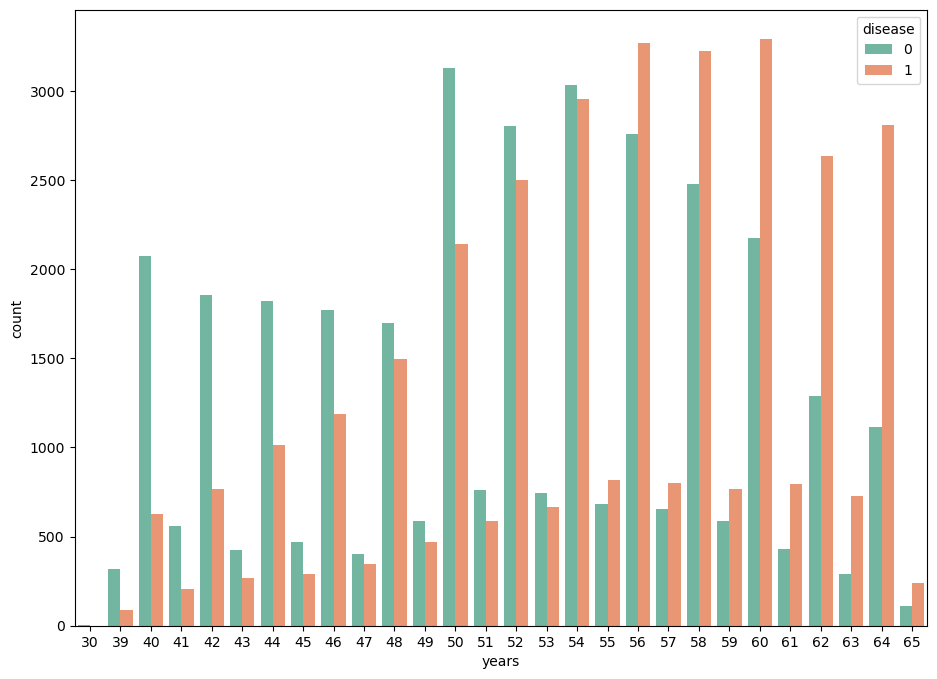

In [5]:
from matplotlib import rcParams

#converting the age to years from days
rcParams['figure.figsize']= 11, 8
health_dataset['years']=(health_dataset['age']/365).round().astype('int')

#displaying the charts
sns.countplot(x='years', hue='disease', data = health_dataset, palette = "Set2")

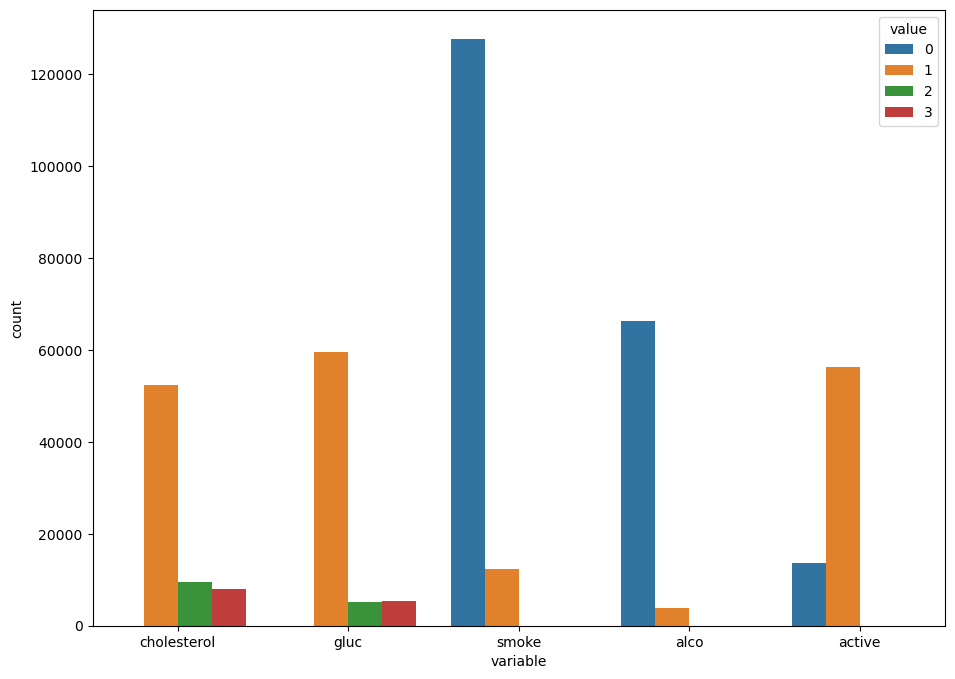

In [6]:
health_dataset_categorical = health_dataset.loc[:,['cholesterol','gluc',
                                                   'smoke', 'smoke', 'alco',
                                                  'active']]
sns.countplot(x="variable", hue="value", data=pd.melt(health_dataset_categorical));

/Users/edselfabre/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


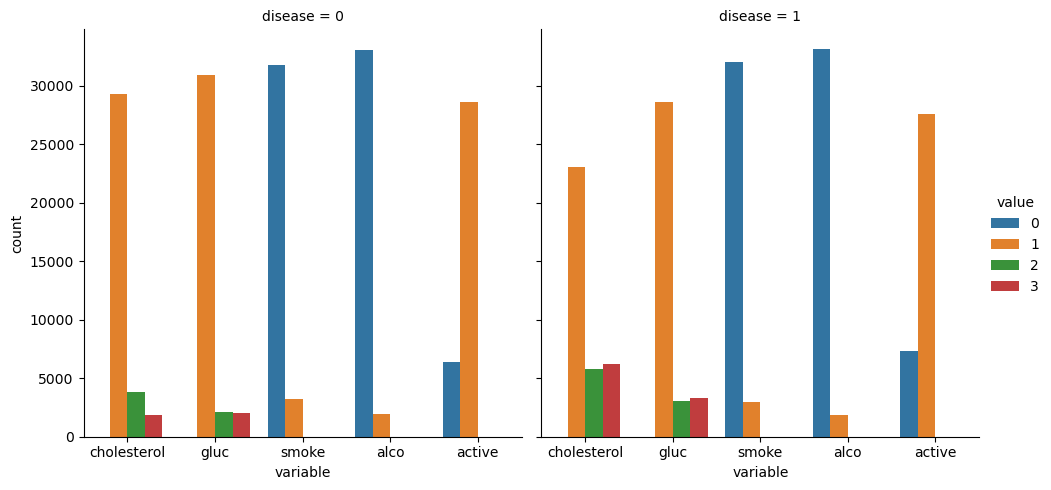

In [7]:
health_dataset_long = pd.melt(health_dataset, id_vars=['disease'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="disease",
                data=health_dataset_long, kind="count");

In [8]:
health_dataset.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [9]:
health_dataset['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [10]:
health_dataset.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [11]:
health_dataset['disease'].value_counts(normalize=True)

disease
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [12]:
pd.crosstab(health_dataset['disease'],health_dataset['gender'], normalize = True)

gender,1,2
disease,,
0,0.327343,0.172957
1,0.323086,0.176614


In [13]:
health_dataset.isnull().values.any()

False

In [14]:
health_dataset.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700,53.338686
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003,6.765294
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000,30.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000,48.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000,54.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000,58.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000,65.000000


In [15]:
health_dataset.drop(health_dataset[(health_dataset['height'] > health_dataset['height'].quantile(0.975)) | (health_dataset['height'] < health_dataset['height'].quantile(0.025))].index,inplace=True)
health_dataset.drop(health_dataset[(health_dataset['weight'] > health_dataset['weight'].quantile(0.975)) | (health_dataset['weight'] < health_dataset['weight'].quantile(0.025))].index,inplace=True)

In [16]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(health_dataset[health_dataset['ap_lo']> health_dataset['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [17]:
health_dataset.drop(health_dataset[(health_dataset['ap_hi'] > health_dataset['ap_hi'].quantile(0.975)) | (health_dataset['ap_hi'] < health_dataset['ap_hi'].quantile(0.025))].index, inplace = True)
health_dataset.drop(health_dataset[(health_dataset['ap_lo'] > health_dataset['ap_lo'].quantile(0.975)) | (health_dataset['ap_lo'] < health_dataset['ap_lo'].quantile(0.025))].index, inplace = True)

Diastilic pressure is higher than systolic one in 0 cases


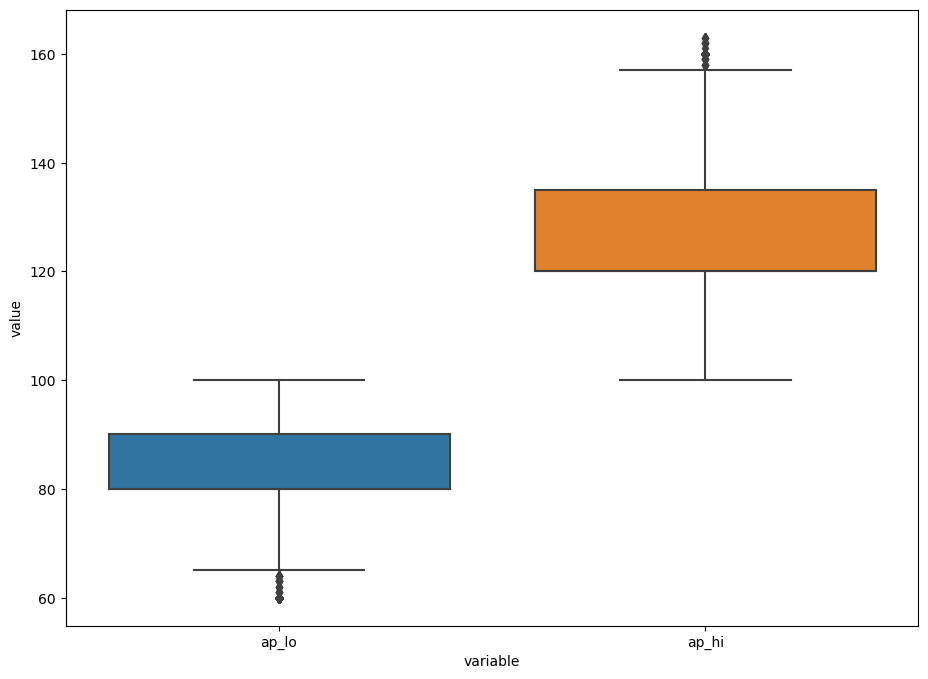

In [18]:
blood_pressure = health_dataset.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(health_dataset[health_dataset['ap_lo']> health_dataset['ap_hi']].shape[0]))

In [19]:
cols_del=['country', 'date', 'occupation']
health_dataset.drop(cols_del, axis=1, inplace=True)
health_dataset.shape

(60142, 14)

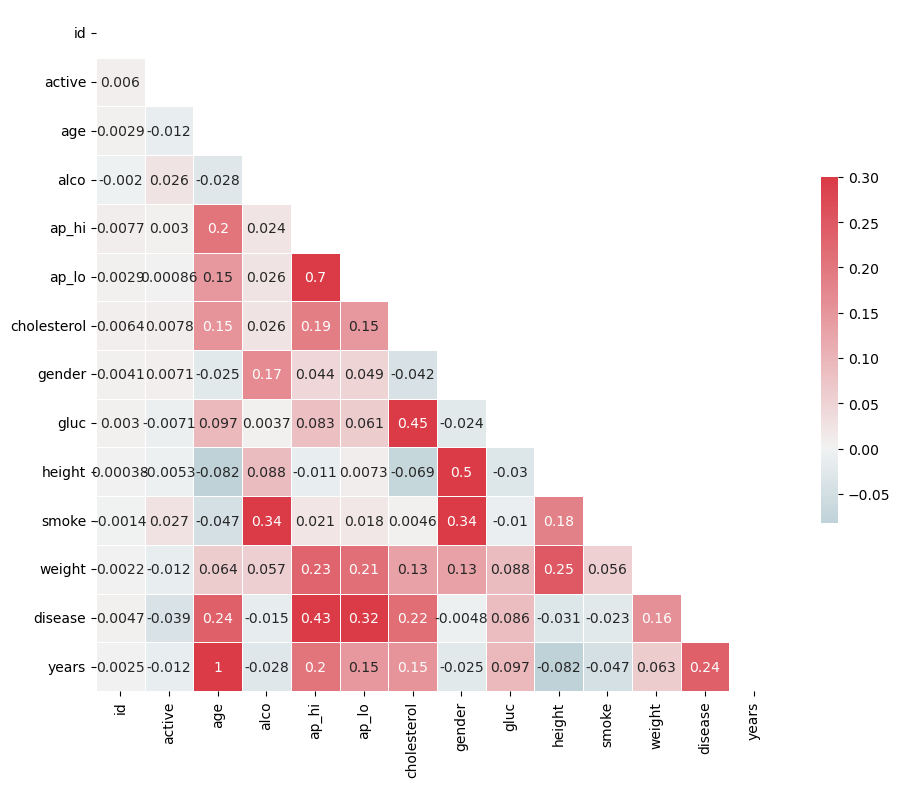

In [20]:
corr = health_dataset.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=int)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

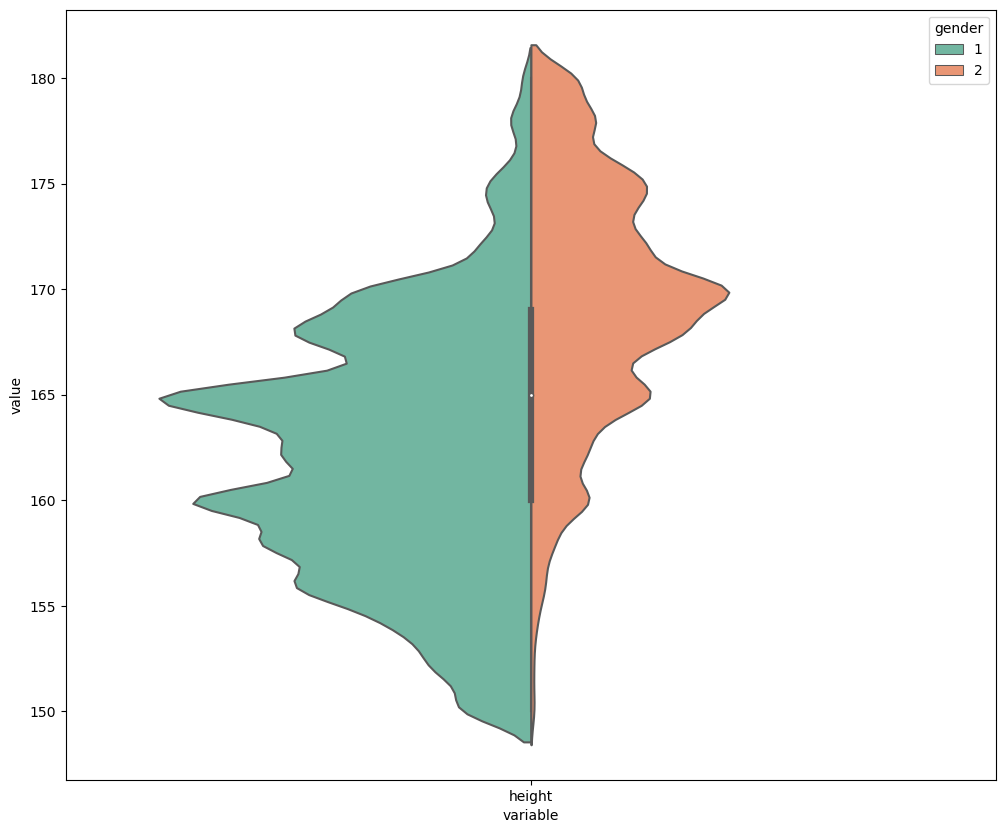

In [21]:
import warnings
warnings.filterwarnings("ignore")
health_dataset_melt = pd.melt(frame=health_dataset, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=health_dataset_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

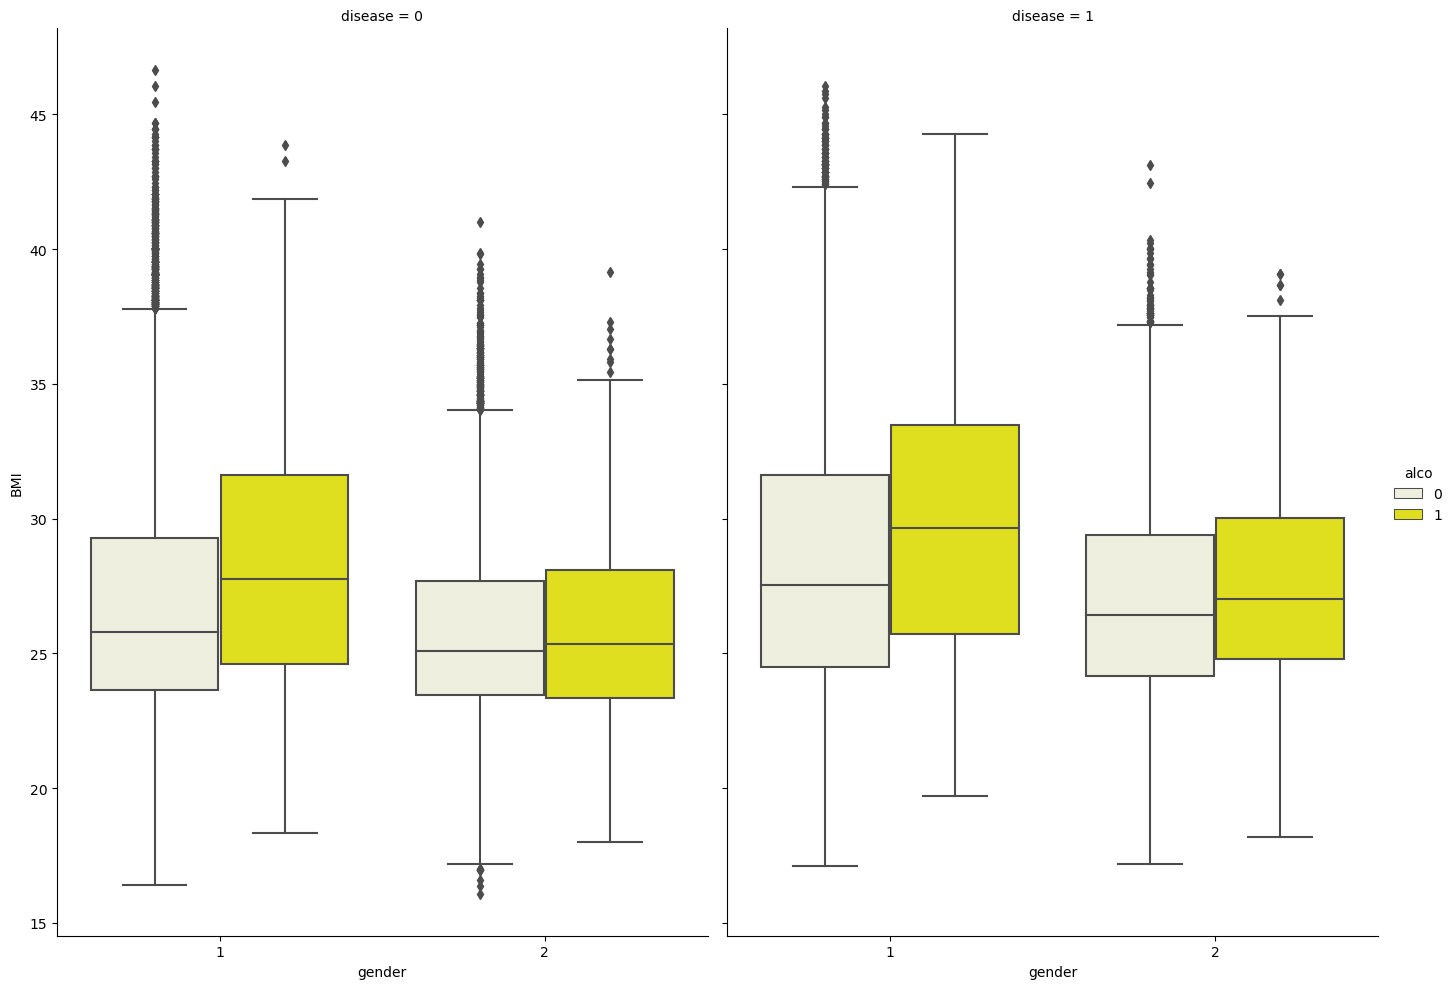

In [22]:
health_dataset['BMI'] = health_dataset['weight']/((health_dataset['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="disease", data=health_dataset, color = "yellow",kind="box", height=10, aspect=.7);

# Train Data Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = health_dataset.drop('disease',axis=1)
y = health_dataset['disease']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [24]:
X_train.shape

(48113, 14)

In [25]:
X_test.shape

(12029, 14)

In [26]:
Y_train.shape

(48113,)

In [27]:
Y_test.shape

(12029,)

# Model Fitting

In [28]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [30]:
Y_pred_lr.shape

(12029,)

In [31]:
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression: 70.83 %


# Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = lr.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

score = round(accuracy_score(Y_test, Y_pred)*100,2)

In [33]:
print("The accuracy score achieved using Confusion Matrix: "+str(score)+" %")

The accuracy score achieved using Confusion Matrix: 70.83 %


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [35]:
Y_pred_nb.shape

(12029,)

In [36]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes: 71.32 %


In [37]:
health_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60142 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60142 non-null  int64  
 1   active       60142 non-null  int64  
 2   age          60142 non-null  int64  
 3   alco         60142 non-null  int64  
 4   ap_hi        60142 non-null  int64  
 5   ap_lo        60142 non-null  int64  
 6   cholesterol  60142 non-null  int64  
 7   gender       60142 non-null  int64  
 8   gluc         60142 non-null  int64  
 9   height       60142 non-null  int64  
 10  smoke        60142 non-null  int64  
 11  weight       60142 non-null  float64
 12  disease      60142 non-null  int64  
 13  years        60142 non-null  int64  
 14  BMI          60142 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 7.3 MB


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [39]:
print(Y_pred_dt.shape)

(12029,)


In [40]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree: 63.71 %


# Random Forest

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cl_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                              n_estimators=100, oob_score=True)

In [42]:
cl_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [43]:
cl_rf.oob_score_

0.7225697836343608

In [44]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

parameters = {
    'n_estimators':[50,100,200],
    'min_samples_leaf':[1,2,4]
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           cv = 4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [47]:
grid_search.best_score_

0.725209396892329

In [48]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(min_samples_leaf=4, n_jobs=-1, random_state=42)

In [49]:
rf_best.feature_importances_

array([0.10654623, 0.01039339, 0.14784404, 0.00332263, 0.22728669,
       0.1103205 , 0.05639777, 0.01113043, 0.01175076, 0.06640703,
       0.00488479, 0.0758691 , 0.0643424 , 0.10350424])

In [50]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,ap_hi,0.227287
2,age,0.147844
5,ap_lo,0.110321
0,id,0.106546
13,BMI,0.103504
11,weight,0.075869
9,height,0.066407
12,years,0.064342
6,cholesterol,0.056398
8,gluc,0.011751


In [51]:
score_rf = round((grid_search.best_score_)*100,2)
print("The accuracy score acheived using the Random Forest: "+str(score_rf)+" %")

The accuracy score acheived using the Random Forest: 72.52 %


# XGBoost

In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [53]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [54]:
Y_pred_xgb.shape

(12029,)

In [55]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost: 72.8 %


# Neural Network

In [56]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 1s 218us/step - accuracy: 0.5093 - loss: 119.4184
Epoch 2/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.5145 - loss: 16.9833
Epoch 3/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.5296 - loss: 15.1849
Epoch 4/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.5330 - loss: 15.4768
Epoch 5/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.5430 - loss: 15.6192
Epoch 6/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.5580 - loss: 12.3141
Epoch 7/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.5642 - loss: 11.4835
Epoch 8/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.5784 - loss: 9.4399
Epoch 9/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.5640 - loss: 12.1740
Epoch 10/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.5685 - loss: 14.2958
Epoch 11/300
1504/1504 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.5768 - 

In [65]:
Y_pred_nn = model.predict(X_test)

376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step


In [66]:
Y_pred_nn.shape

(12029, 1)

In [67]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [68]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network: 72.03 %


In [70]:
scores = [score_lr,score_nb,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 70.83 %
The accuracy score achieved using Naive Bayes is: 71.32 %
The accuracy score achieved using Decision Tree is: 63.71 %
The accuracy score achieved using Random Forest is: 72.52 %
The accuracy score achieved using XGBoost is: 72.8 %
The accuracy score achieved using Neural Network is: 72.03 %


<Axes: xlabel='algorithms', ylabel='scores'>

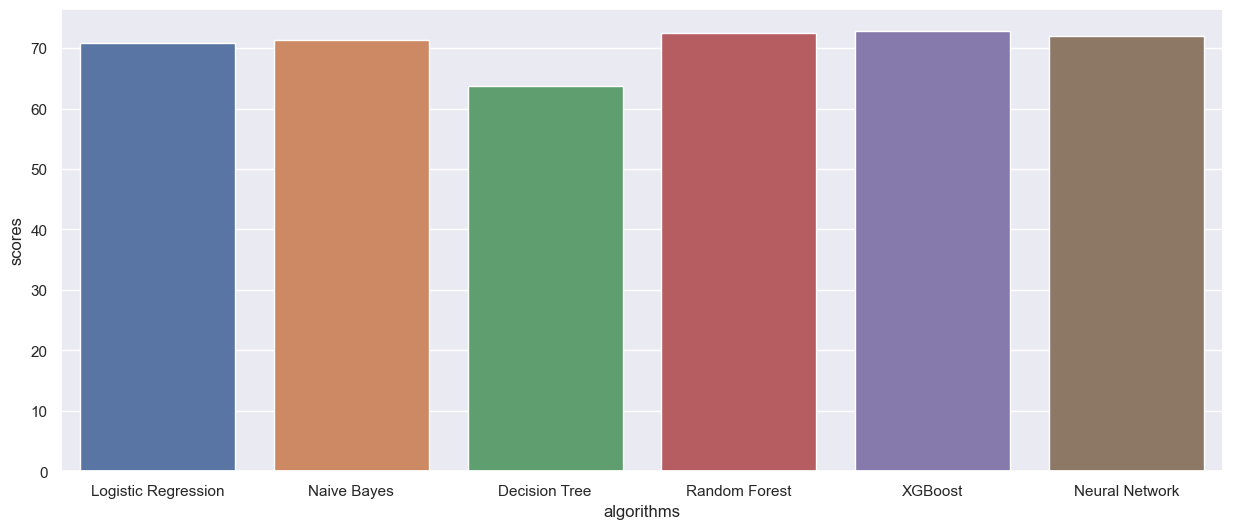

In [80]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("algorithms")
plt.ylabel("scores")

sns.barplot(x=algorithms, y=scores)

# The highest result as compare to other algorithms, the XGBoost has the good result.